In [1]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import os

In [2]:
from utils.data_loader import fetch_yf_stock_data, add_technical_indicator

In [4]:
ticker = "GC=F"

In [5]:
df_cur = fetch_yf_stock_data(ticker, interval='15m', period='60d', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [8]:
pricefile = f"./data/{ticker}15m_yfprice.csv"
if os.path.isfile(pricefile):
    df_last = pd.read_csv(pricefile, index_col=0)
    df_last.index = pd.to_datetime(df_last.index).strftime("%Y-%m-%d %H:%M:%S")
    df_last.reset_index(inplace=True)
    last_day = df_last['Datetime'].iloc[0]
    df_last.to_csv(f"./data/{ticker}T15m_yfprice_{last_day.replace('-', '').replace(' ', '').replace(':', '')}.csv", index=False)
else:
    df_last = pd.DataFrame()
    last_day = df_cur.index[-1]
last_day

'2025-05-22 01:00:00'

In [10]:
df_cur.reset_index(inplace=True)
last_day_idx = df_cur['Datetime'].to_list().index(last_day)
df_cur = df_cur.iloc[:last_day_idx]
if len(df_cur) == 0:
    df_new = df_last
else:
    df_new = pd.concat([df_cur, df_last], ignore_index=False)
df_new.index = df_new['Datetime']
df_final = df_new.drop(['Datetime'], axis=1)
df_final.head()

,Adj Close,Close,High,Low,Open,Volume
Datetime,,,,,,
2025-05-26 03:45:00,3346.300049,3346.300049,3346.300049,3346.300049,3346.300049,0
2025-05-26 02:30:00,3351.000000,3351.000000,3353.699951,3345.399902,3346.500000,1570
2025-05-26 02:15:00,3346.600098,3346.600098,3348.399902,3344.000000,3345.699951,927
2025-05-26 02:00:00,3345.600098,3345.600098,3348.800049,3341.300049,3343.199951,1076
2025-05-26 01:45:00,3343.300049,3343.300049,3346.100098,3341.100098,3343.800049,1176


In [11]:
df_final.to_csv(pricefile)

In [12]:
df_ta = add_technical_indicator(df_final[::-1])
df_ta.tail()

,Adj Close,Close,High,Low,Open,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,...,MACDD_sign,MACDD_sign_shift,MACDD_sign_signal,WilliamsR,WilliamsR_signal,sma50,sma200,sma_signal,ATR10,ATR20
Datetime,,,,,,,,,,,,,,,,,,,,,
2025-05-26 01:45:00,3343.300049,3343.300049,3346.100098,3341.100098,3343.800049,1176,3345.274976,3362.038946,3328.511005,0.0,...,1,-1.0,1,-31.034649,0,3353.263994,3324.308502,1,6.532065,6.396360
2025-05-26 02:00:00,3345.600098,3345.600098,3348.800049,3341.300049,3343.199951,1076,3344.494983,3359.591251,3329.398715,0.0,...,1,1.0,0,-19.704386,1,3353.009995,3324.446503,1,6.628858,6.451542
2025-05-26 02:15:00,3346.600098,3346.600098,3348.399902,3344.000000,3345.699951,927,3343.774988,3356.898514,3330.651462,0.0,...,1,1.0,0,-13.064655,1,3352.789995,3324.576503,1,6.405963,6.348960
2025-05-26 02:30:00,3351.000000,3351.000000,3353.699951,3345.399902,3346.500000,1570,3343.454993,3355.501978,3331.408008,0.0,...,1,1.0,0,-11.065418,1,3352.701997,3324.732502,1,6.595371,6.446514
2025-05-26 03:45:00,3346.300049,3346.300049,3346.300049,3346.300049,3346.300049,0,3342.884998,3353.125377,3332.644618,0.0,...,1,1.0,0,-30.327590,0,3352.597998,3324.867003,1,6.405829,6.359186


In [14]:
from utils.general import plot_lines

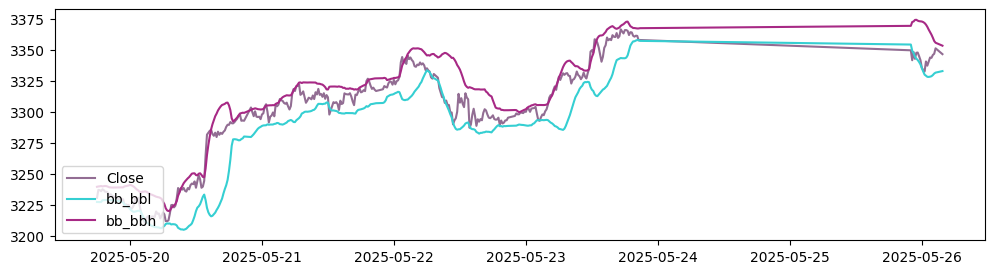

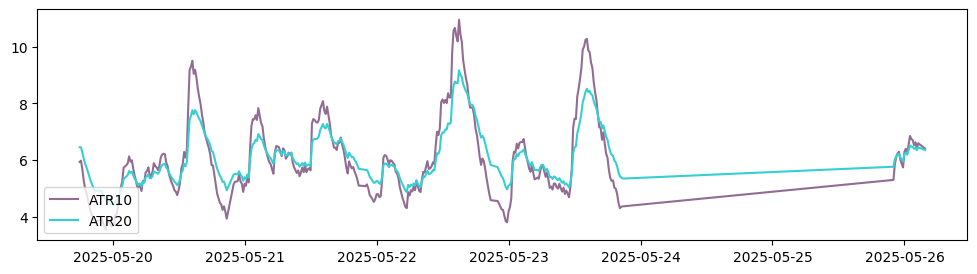

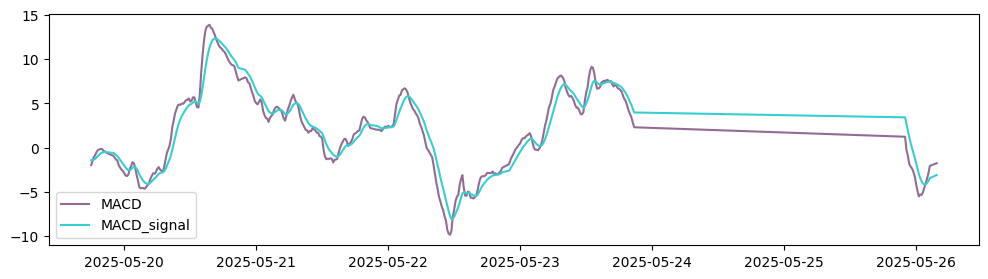

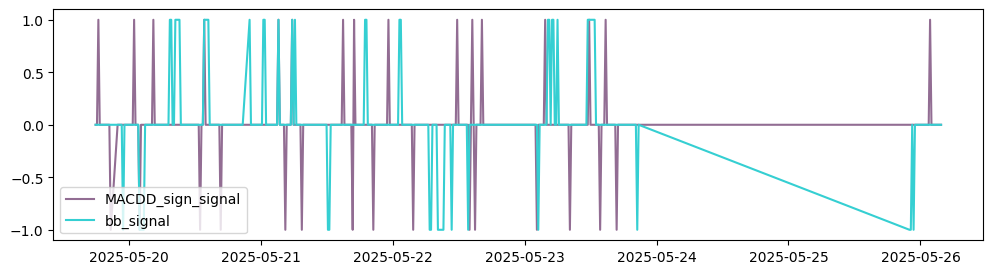

In [17]:
st_idx = -400
plot_lines(df_ta, ['Close','bb_bbl','bb_bbh'], st_idx)
plot_lines(df_ta, ['ATR10','ATR20'], st_idx)
plot_lines(df_ta, ['MACD','MACD_signal'], st_idx)
plot_lines(df_ta, ['MACDD_sign_signal','bb_signal'], st_idx)

In [1]:
from utils.data_loader import fetch_investing_news_data, fetch_yfinance_news_data

In [2]:
import pandas as pd
# end_datetime = pd.to_datetime(df_GC.index[-1])
end_datetime = pd.to_datetime('2024-05-22 00:00:00')
end_datetime

Timestamp('2024-05-22 00:00:00')

In [4]:
df_GC_investing = fetch_investing_news_data('GC=F', end_datetime=end_datetime, max_page=1000)

News collected from 2025-05-22 04:40:46 to 2024-05-22 04:41:02


In [5]:
df_GC_investing.to_csv('./data/GC_news_investing_052125.csv', index=False)

In [3]:
df_GC_yfinance = fetch_yfinance_news_data('GC=F', end_datetime=end_datetime, max_sroll=100)

News Collecting...
News collected from 2025-05-21 22:05:00 to 2025-01-31 18:44:00


In [4]:
df_GC_yfinance.to_csv('./data/GC_news_yfinance_051425.csv')